## Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

## Load Data

In [3]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob__all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [4]:
wwc = np.array([1, 2, 3])
ggp = np.array([0, 5, 4])
np.matmul(wwc, ggp)

22

**Challenge:** Can you figure out the dimensions of the dot product between X_test and prob_token_spam 

In [5]:
X_test.shape

(1725, 2500)

In [6]:
prob_token_spam.shape

(2500,)

In [7]:
print('Shape of the dot product is ', X_test.dot(prob_token_spam).shape)

Shape of the dot product is  (1725,)


## Set the prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)}{P(X)}$$

In [8]:
PROB_SPAM = 0.3116

**Challenge:** Do you recall how to take the log of a numpy array? Calculate the log prob of tokens given that the email was spam. This was stored in prob_token_spam

In [9]:
np.log(prob_token_spam)

array([ -4.47993173,  -5.26433046,  -4.96239403, ...,  -9.34882272,
        -9.29166431, -11.48888889])

## Joint probability in log format

In [27]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob__all_tokens)) + np.log(PROB_SPAM)

In [28]:
joint_log_spam[:5]

array([20.12945614,  0.8752267 , 18.53183461, 17.23254716, 20.27894025])

**Challenge** Calculate the log probabilty that the emails are non-spam given their tokens. Store the result in a variable called joint_log_ham

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham \,) \, (1- P(Spam))}{P(X)}$$

In [29]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob__all_tokens)) + np.log(1-PROB_SPAM)

In [30]:
joint_log_ham[:5]

array([-59.08387534, -10.90398895, -36.35551152, -60.90341935,
       -53.98688524])

In [31]:
joint_log_ham.size

1725

## Making Predictions

### Checking for the higher joint probabilty

$$P(Spam \, | \, X) \, > P(Ham \, | \, X)$$
<center>**OR**</center>
$$P(Spam \, | \, X) \, < P(Ham \, | \, X)$$

**Challenge** Can you create the vector of predictions, our $\hat y$ ? Remember that spam emails could have the value 1 (true) and non-spam emails should have the value zero (false).

In [32]:
prediction = joint_log_spam > joint_log_ham

In [33]:
prediction[-5:]*1

array([0, 0, 0, 0, 0])

In [34]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

## Simplify

$$P(Spam \, | \, X)P(Spam) \neq \frac{P(X \, | \, Spam \,) \, P(Spam)}{P(X)}$$

In [35]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

## Metrics and Evaluation
### Accuracy

In [36]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified correctly', numdocs_wrong)

Docs classified correctly 1677
Docs classified correctly 48


In [37]:
# Accuracy
correct_docs/len(X_test)

0.9721739130434782

In [38]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 2.78%
Accuracy of the model is 97.22%


## Visualizing the Results

In [22]:
# Chart Styling info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

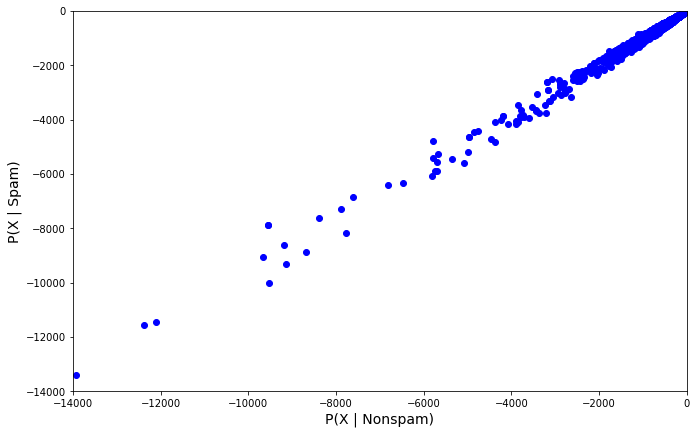

In [23]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])


plt.scatter(joint_log_ham, joint_log_spam, color='b')
plt.show()

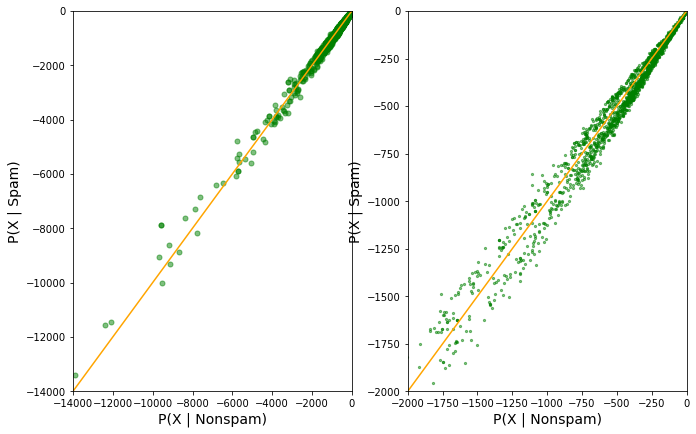

In [41]:
plt.figure(figsize=(11,7))

# Chart No.1
plt.subplot(1,2,1)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])
plt.scatter(joint_log_ham, joint_log_spam, color='g', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart No.2
plt.subplot(1,2,2)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
# Set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])
plt.scatter(joint_log_ham, joint_log_spam, color='g', alpha=0.5, s=5)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [42]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, 
                           labels: y_test})

C:\Users\User\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


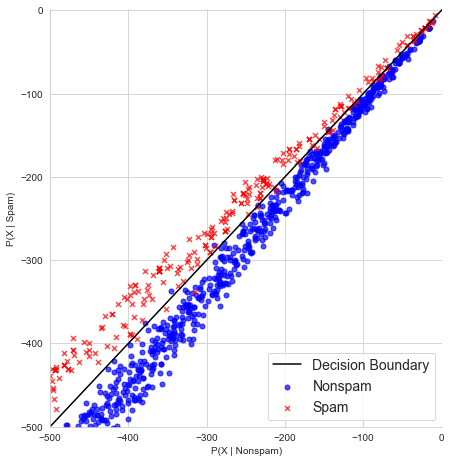

In [67]:
my_colors = ['b', 'r']
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, 
           hue=labels, markers=['o','x'], palette=my_colors, legend=False,
           scatter_kws={'alpha':0.7, 's':25})
plt.xlim([-500, 1])
plt.ylim([-500, 1])
plt.plot(linedata, linedata, color='black')
plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)
#sns.plt.show

## False Positives and False Negatives

In [68]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1158,  567], dtype=int64))

In [71]:
true_pos = (y_test==1)&(prediction==1)
true_pos.sum()

555

In [72]:
true_pos

array([ True,  True,  True, ..., False, False, False])

**Challenge:** Create a numpy array that measures the False Positives for each datapoint. Call this variable false_pos. Then work out how many false positives there were. After yov've done that, do same for the false negatives. Store those in a variable called false_neg

In [74]:
false_pos = (y_test==0)&(prediction==1)
false_pos.sum()

12

In [75]:
false_neg = (y_test==1)&(prediction==0)
false_neg.sum()

36

## Recall Score
**Challenge:** Calculate the recall score. Store it in a variable called recall_score. Print the value of the recall score as a percentage rounded to two decimal places.

In [87]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('The recall score is {:.2%}'.format(recall_score))

The recall score is 93.91%


In [91]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('The recall score is ', round(recall_score, 2))

The recall score is  0.94


## Precision Score
**Challenge:** Calculate the precision of our naive bayes model. Store the result in a variable called precision_score. Print out the precision as a decimal number rounded to three decimal places

In [94]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('The recall score is ', round(precision_score, 3))

The recall score is  0.979


In [96]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('The recall score is {:.3f}'.format(precision_score))

The recall score is 0.979


## F-Score or F1 Score

In [98]:
f1_score = 2*(precision_score*recall_score)/(precision_score+recall_score)
print('F Score is {:.2f}'.format(f1_score))

F Score is 0.96
